In [12]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/adidas%20quarterly%20sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [13]:
import plotly.express as px
figure = px.line(data, x="Time Period",
                y="Revenue",
                title="Ouarterly Sales Revenue of Adidas in Millions")
figure.show()

In [31]:
result = seasonal_decompose(data["Revenue"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

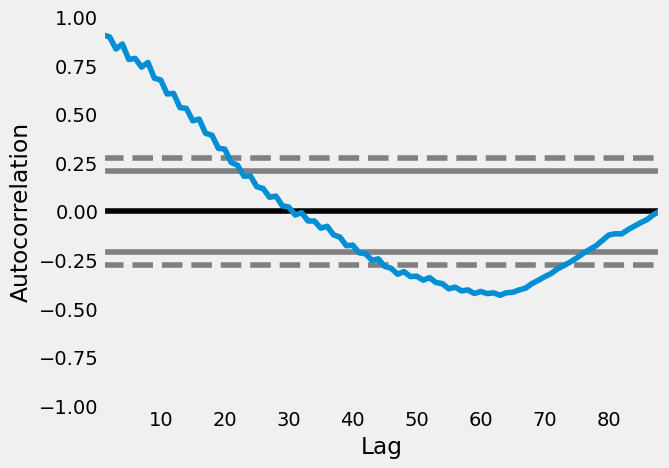

In [18]:
pd.plotting.autocorrelation_plot(data["Revenue"])

C:\Users\fatih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



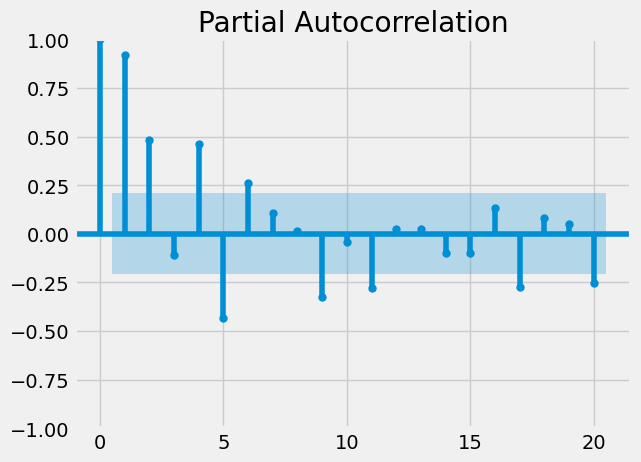

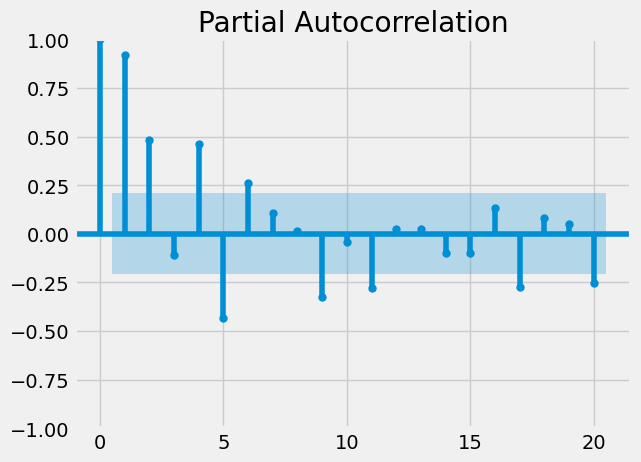

In [22]:
plot_pacf(data["Revenue"], lags = 20)

In [23]:
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

NameError: name 'p' is not defined

In [28]:

predictions = model.predict(len(data), len(data)+7)
print(predictions)

NameError: name 'model' is not defined